In [ ]:
# city, number of days, budget, touristic or not
# adventures or not, family friendly or not, type of breakfast, type of lunch, type of dinner, minimum review number, rating (stars), outdoor or not, noise level,

# if he choosed not family friendly then see if its romantic or not

# trendy or classy or casual

# while runnig the reinforcment model pass to it an attribute called (other prefrecncess) this will have the data as from the user interaction with his feed on
# his social media

user_pref = []

#if family friendly = true => good for kids column is true
#if not then

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("z.csv")

In [ ]:
# count of missing values in each column
df.isna().sum()

,0
business_id,0
name,0
address,102
city,0
state,0
postal_code,0
latitude,0
longitude,0
stars,0
review_count,0


In [ ]:
# drop :
#permenant
#state, business id, postal code
#temp
#hours all week days, good for gourps, attrie, good for dinner, lunch, mid night, breakfasst
df.drop(columns=['business_id', 'state', 'postal_code', 'state', 'attributes_WiFi', 'hours_Monday',
                 'hours_Tuesday','hours_Wednesday','hours_Thursday','hours_Friday','hours_Saturday','hours_Sunday',
                 'attributes_RestaurantsGoodForGroups','attributes_RestaurantsAttire','attributes_NoiseLevel',
                 'attributes_GoodForMeal_dessert','attributes_GoodForMeal_latenight',
                 'attributes_GoodForMeal_lunch','attributes_GoodForMeal_dinner','attributes_GoodForMeal_brunch',
                 'attributes_GoodForMeal_breakfast'], inplace=True)

In [ ]:
# count of missing values in each column
df.isna().sum()

,0
name,0
address,102
city,0
latitude,0
longitude,0
stars,0
review_count,0
attributes_RestaurantsDelivery,4606
attributes_OutdoorSeating,4755
attributes_BusinessAcceptsCreditCards,718


In [ ]:
df.dtypes

,0
name,object
address,object
city,object
latitude,float64
longitude,float64
stars,float64
review_count,int64
attributes_RestaurantsDelivery,object
attributes_OutdoorSeating,object
attributes_BusinessAcceptsCreditCards,object


In [ ]:
print(df)

                       name             address            city   latitude  \
0        St Honore Pastries         935 Race St    Philadelphia  39.955505   
1                  Tuna Bar         205 Race St    Philadelphia  39.953949   
2                       BAP       1224 South St    Philadelphia  39.943223   
3             Ardmore Pizza   10 Rittenhouse Pl         Ardmore  40.006707   
4                Craft Hall  901 N Delaware Ave    Philadelphia  39.962582   
...                     ...                 ...             ...        ...   
16695     El Cap Restaurant       3500 4th St N  St. Petersburg  27.804140   
16696    Sage Mediterranean       150 Bridge St    Phoenixville  40.134042   
16697       HighWire Lounge    14 S Arizona Ave          Tucson  32.221828   
16698    Whole Foods Market    4577 W Pine Blvd       St. Louis  38.641988   
16699  Bittercreek Alehouse        246 N 8th St           Boise  43.616590   

        longitude  stars  review_count attributes_RestaurantsDe

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.head()

,name,address,city,latitude,longitude,stars,review_count,attributes_RestaurantsDelivery,attributes_OutdoorSeating,attributes_BusinessAcceptsCreditCards,attributes_RestaurantsPriceRange2,attributes_RestaurantsTakeOut,categories,attributes_GoodForKids,attributes_Ambience_touristy,attributes_Ambience_romantic,attributes_Ambience_intimate,attributes_Ambience_trendy,attributes_Ambience_classy,attributes_Ambience_casual
0,St Honore Pastries,935 Race St,Philadelphia,39.955505,-75.155564,4.0,80,False,False,False,1.0,True,"Restaurants_Cuisines, Cafes",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tuna Bar,205 Race St,Philadelphia,39.953949,-75.143226,4.0,245,True,True,True,2.0,True,Restaurants_Cuisines,False,False,False,False,False,True,False
2,BAP,1224 South St,Philadelphia,39.943223,-75.162568,4.5,205,NaN,NaN,True,1.0,True,Restaurants_Cuisines,True,False,False,NaN,False,False,True
3,Ardmore Pizza,10 Rittenhouse Pl,Ardmore,40.006707,-75.289671,3.5,109,True,False,True,1.0,True,Restaurants_Cuisines,True,False,False,False,False,False,True
4,Craft Hall,901 N Delaware Ave,Philadelphia,39.962582,-75.135657,3.5,65,True,True,True,2.0,True,Restaurants_Cuisines,True,False,False,False,False,True,False


In [ ]:
df_array = df.iloc[:,3:]

# print(df.isna().sum())

In [ ]:
print(type(df_array))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_array

,latitude,longitude,stars,review_count,attributes_RestaurantsDelivery,attributes_OutdoorSeating,attributes_BusinessAcceptsCreditCards,attributes_RestaurantsPriceRange2,attributes_RestaurantsTakeOut,categories,attributes_GoodForKids,attributes_Ambience_touristy,attributes_Ambience_romantic,attributes_Ambience_intimate,attributes_Ambience_trendy,attributes_Ambience_classy,attributes_Ambience_casual
0,39.955505,-75.155564,4.0,80,False,False,False,1.0,True,"Restaurants_Cuisines, Cafes",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39.953949,-75.143226,4.0,245,True,True,True,2.0,True,Restaurants_Cuisines,False,False,False,False,False,True,False
2,39.943223,-75.162568,4.5,205,NaN,NaN,True,1.0,True,Restaurants_Cuisines,True,False,False,NaN,False,False,True
3,40.006707,-75.289671,3.5,109,True,False,True,1.0,True,Restaurants_Cuisines,True,False,False,False,False,False,True
4,39.962582,-75.135657,3.5,65,True,True,True,2.0,True,Restaurants_Cuisines,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,27.804140,-82.638855,3.5,414,False,True,True,1.0,True,Restaurants_Cuisines,True,False,False,False,False,False,True
16696,40.134042,-75.514528,4.0,118,True,False,True,2.0,True,Restaurants_Cuisines,True,False,False,False,False,True,True
16697,32.221828,-110.967969,3.5,111,False,True,True,2.0,False,"Bars_Night, Restaurants_Cuisines",False,False,False,False,True,True,True
16698,38.641988,-90.261655,4.0,71,NaN,NaN,True,3.0,True,"Beauty_Health_Care, Shops",True,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.values
print(df)

[['St Honore Pastries' '935 Race St' 'Philadelphia' ... nan nan nan]
 ['Tuna Bar' '205 Race St' 'Philadelphia' ... False True False]
 ['BAP' '1224 South St' 'Philadelphia' ... False False True]
 ...
 ['HighWire Lounge' '14 S Arizona Ave' 'Tucson' ... True True True]
 ['Whole Foods Market' '4577 W Pine Blvd' 'St. Louis' ... nan nan nan]
 ['Bittercreek Alehouse' '246 N 8th St' 'Boise' ... True False True]]


In [ ]:
name_address_city = df[:,:3]
df = df[:,3:]

In [ ]:
print(name_address_city)

[['St Honore Pastries' '935 Race St' 'Philadelphia']
 ['Tuna Bar' '205 Race St' 'Philadelphia']
 ['BAP' '1224 South St' 'Philadelphia']
 ...
 ['HighWire Lounge' '14 S Arizona Ave' 'Tucson']
 ['Whole Foods Market' '4577 W Pine Blvd' 'St. Louis']
 ['Bittercreek Alehouse' '246 N 8th St' 'Boise']]


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df)
df = imputer.transform(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[:,4] = le.fit_transform(df[:,4])
#
lst = [4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16]
for x in lst:
    df[:, x] = le.fit_transform(df[:, x])
#df[:, [4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16]] = df[:, [4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16]].apply(le.fit_transform)

In [ ]:
df[0][:]

array([39.9555052, -75.1555641, 4.0, 80, 0, 0, 0, 1.0, 1,
       'Restaurants_Cuisines, Cafes', 1, 0, 0, 0, 0, 0, 1], dtype=object)

In [ ]:
category = df[:,9]
print(category)

['Restaurants_Cuisines, Cafes' 'Restaurants_Cuisines'
 'Restaurants_Cuisines' ... 'Bars_Night, Restaurants_Cuisines'
 'Beauty_Health_Care, Shops' 'Bars_Night, Restaurants_Cuisines']


In [ ]:
category[0][:]

'Restaurants_Cuisines, Cafes'

In [ ]:
dfcateg = df_array.iloc[:,9]

In [ ]:
dfcateg = dfcateg.apply(lambda x: x.split(', '))

In [ ]:
dfcateg = dfcateg.values

In [ ]:
print(type(dfcateg))
print(dfcateg.shape)

<class 'numpy.ndarray'>
(16700,)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
category_transformed = mlb.fit_transform(dfcateg)


In [ ]:
print(mlb.classes_)

['Bars_Night' 'Beauty_Health_Care' 'Cafes' 'GYM' 'Restaurants_Cuisines'
 'Shops']


In [ ]:
print(category_transformed[0])

[0 0 1 0 1 0]


In [ ]:
type(df_array)

pandas.core.frame.DataFrame

In [ ]:
import pandas as pd
category_df = pd.DataFrame(category_transformed, columns=mlb.classes_)
category_df.index = df_array.index

dfd = df_array.join(category_df)
dfd = dfd.drop(columns=['categories'])
print(dfd)


        latitude   longitude  stars  review_count  \
0      39.955505  -75.155564    4.0            80   
1      39.953949  -75.143226    4.0           245   
2      39.943223  -75.162568    4.5           205   
3      40.006707  -75.289671    3.5           109   
4      39.962582  -75.135657    3.5            65   
...          ...         ...    ...           ...   
16695  27.804140  -82.638855    3.5           414   
16696  40.134042  -75.514528    4.0           118   
16697  32.221828 -110.967969    3.5           111   
16698  38.641988  -90.261655    4.0            71   
16699  43.616590 -116.202383    4.5           998   

      attributes_RestaurantsDelivery attributes_OutdoorSeating  \
0                              False                     False   
1                               True                      True   
2                                NaN                       NaN   
3                               True                     False   
4                               T

In [ ]:
category_df = pd.DataFrame(category_transformed, columns=mlb.classes_)
df_array_df = pd.DataFrame(df)

df_array_df = df_array_df.drop(columns=[9])
df_array_df = pd.concat([df_array_df, category_df.reset_index(drop=True)], axis=1)
updated_array = df_array_df.to_numpy()
print(updated_array)


[[39.9555052 -75.1555641 4.0 ... 0 1 0]
 [39.953949 -75.1432262 4.0 ... 0 1 0]
 [39.943223 -75.162568 4.5 ... 0 1 0]
 ...
 [32.2218278 -110.9679691 3.5 ... 0 1 0]
 [38.64198815 -90.26165498 4.0 ... 0 0 1]
 [43.6165895082 -116.2023831706 4.5 ... 0 1 0]]


In [ ]:
print(updated_array[0][:])

[39.9555052 -75.1555641 4.0 80 0 0 0 1.0 1 1 0 0 0 0 0 1 0 0 1 0 1 0]


In [ ]:
#array([39.9555052, -75.1555641, 4.0, 80, 0, 0, 0, 1.0, 1,
#       'Restaurants_Cuisines, Cafes', 1, 0, 0, 0, 0, 0, 1], dtype=object)

In [ ]:
#to be scaled : 0 1 3

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
updated_array[:, [0, 1, 3]] = sc.fit_transform(updated_array[:, [0, 1, 3]])

In [ ]:
print(updated_array[0][:])

[0.7066994607087881 0.9662662834110118 4.0 -0.4152793929083627 0 0 0 1.0 1
 1 0 0 0 0 0 1 0 0 1 0 1 0]


In [ ]:
import matplotlib.pyplot as plt

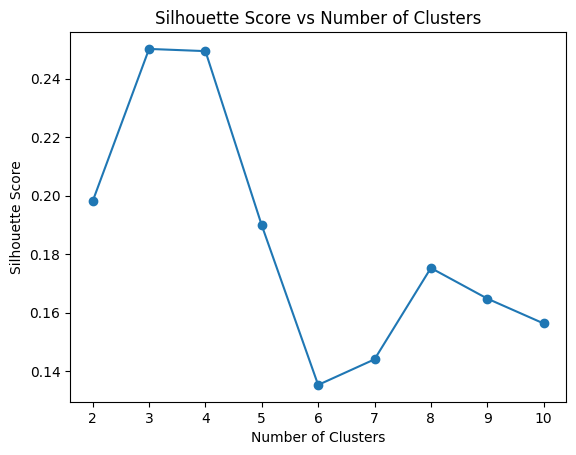

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


silhouette_scores = []
range_of_clusters = range(2, 11)  # We need at least 2 clusters to calculate the silhouette score

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(updated_array)
    score = silhouette_score(updated_array, kmeans_labels)
    silhouette_scores.append(score)

# Plotting the Silhouette Score
plt.plot(range_of_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [ ]:
def getpercentage(score):
    accuracy_percentage = (score + 1) / 2 * 100
    return accuracy_percentage

In [ ]:
getpercentage(0.24)

62.0

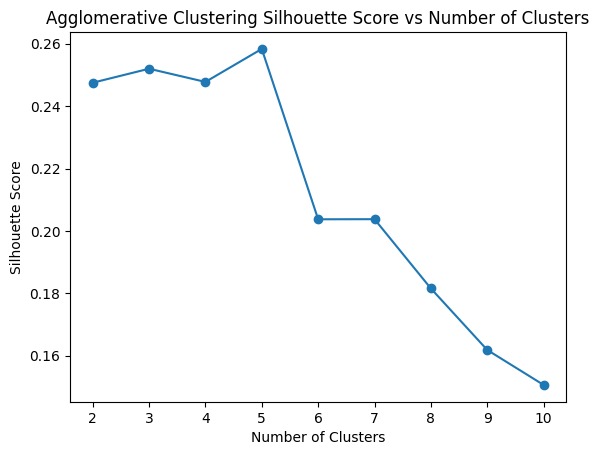

In [ ]:
from sklearn.cluster import AgglomerativeClustering

silhouette_scores_agglomerative = []
range_of_clusters = range(2, 11)

for k in range_of_clusters:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative_labels = agglomerative.fit_predict(updated_array)
    score = silhouette_score(updated_array, agglomerative_labels)
    silhouette_scores_agglomerative.append(score)

plt.plot(range_of_clusters, silhouette_scores_agglomerative, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Clustering Silhouette Score vs Number of Clusters')
plt.show()


In [ ]:
getpercentage(0.26)

63.0

[  0   1   2 ...  -1 315  -1]
0.1582404188705536


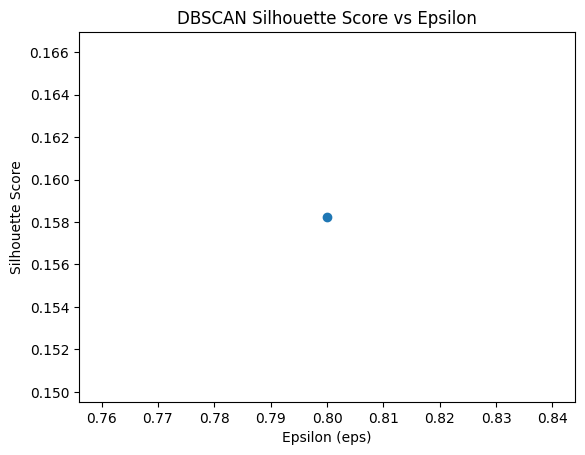

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=2)
dbscan_labels = dbscan.fit_predict(updated_array)
print(dbscan_labels)
if len(set(dbscan_labels)) > 1 :
    score = silhouette_score(updated_array, dbscan_labels)
    print(score)

plt.plot(0.8, score, marker='o')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN Silhouette Score vs Epsilon')
plt.show()


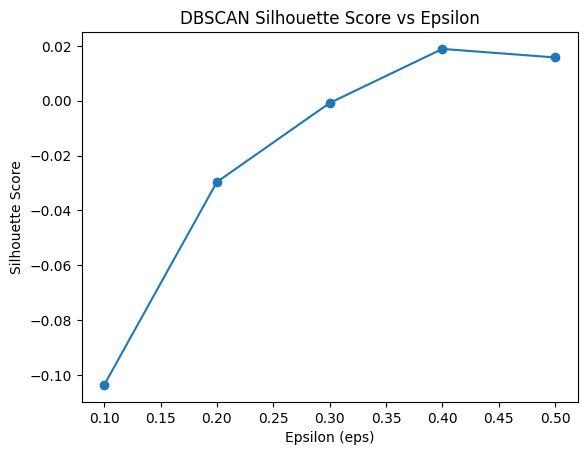

In [ ]:
from sklearn.cluster import DBSCAN
#DBSCAN
silhouette_scores_dbscan = []
eps_range = [0.1, 0.2, 0.3, 0.4, 0.5]

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(updated_array)

    # DBSCAN might label points as -1 (noise), so we only calculate silhouette score for labeled points
    if len(set(dbscan_labels)) > 1:
        score = silhouette_score(updated_array, dbscan_labels)
        silhouette_scores_dbscan.append(score)
    else:
        silhouette_scores_dbscan.append(-1)  # In case DBSCAN has no clusters or all points are noise

plt.plot(eps_range, silhouette_scores_dbscan, marker='o')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN Silhouette Score vs Epsilon')
plt.show()


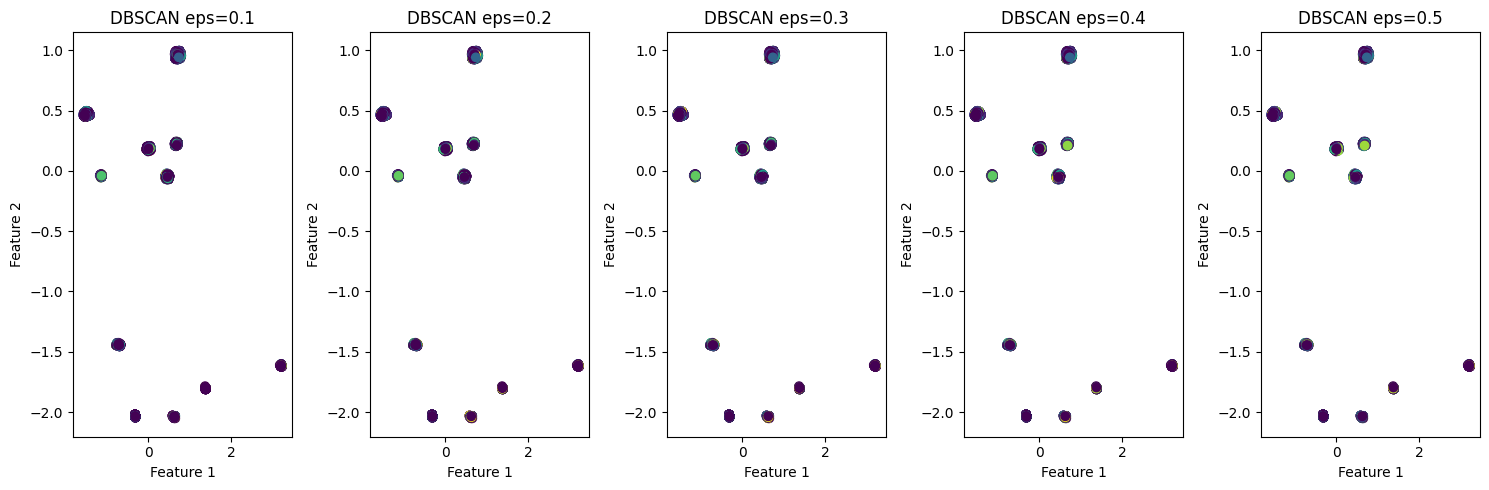

In [ ]:
eps_range = [0.1, 0.2, 0.3, 0.4, 0.5]

# Create a plot
fig, axes = plt.subplots(1, len(eps_range), figsize=(15, 5))

for i, eps in enumerate(eps_range):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(updated_array)

    # Plotting
    axes[i].scatter(updated_array[:, 0], updated_array[:, 1], c=dbscan_labels, cmap='viridis')
    axes[i].set_title(f"DBSCAN eps={eps}")
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

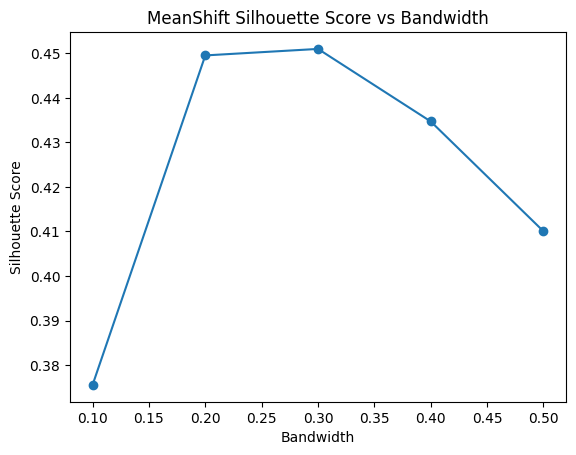

In [ ]:
from sklearn.cluster import MeanShift

# MeanShift doesn't require a number of clusters, so we can experiment with bandwidth values
silhouette_scores_meanshift = []
bandwidth_range = [0.1, 0.2, 0.3, 0.4, 0.5]  # Varying bandwidth values

for bandwidth in bandwidth_range:
    meanshift = MeanShift(bandwidth=bandwidth)
    meanshift_labels = meanshift.fit_predict(updated_array)

    # Only calculate silhouette score if there are more than 1 cluster
    if len(set(meanshift_labels)) > 1:
        score = silhouette_score(updated_array, meanshift_labels)
        silhouette_scores_meanshift.append(score)
    else:
        silhouette_scores_meanshift.append(-1)  # If only 1 cluster, silhouette score is not meaningful

# Plotting the Silhouette Score for MeanShift
plt.plot(bandwidth_range, silhouette_scores_meanshift, marker='o')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.title('MeanShift Silhouette Score vs Bandwidth')
plt.show()


In [ ]:
getpercentage(0.45)

72.5

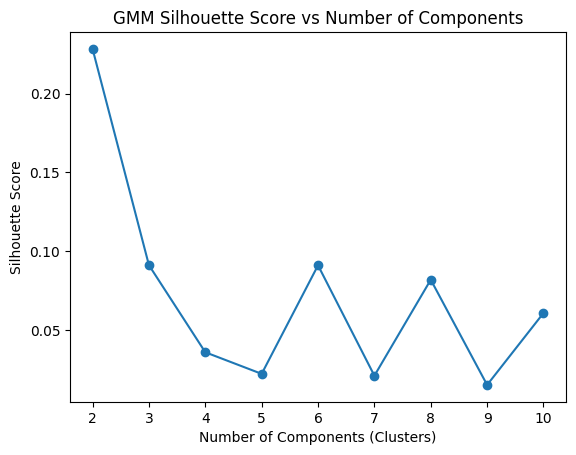

In [ ]:
silhouette_scores_gmm = []
n_components_range = range(2, 11)  # We need at least 2 clusters to calculate the silhouette score
from sklearn.mixture import GaussianMixture

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm_labels = gmm.fit_predict(updated_array)

    # Calculate Silhouette Score
    score = silhouette_score(updated_array, gmm_labels)
    silhouette_scores_gmm.append(score)

# Plotting the Silhouette Score for GMM
plt.plot(n_components_range, silhouette_scores_gmm, marker='o')
plt.xlabel('Number of Components (Clusters)')
plt.ylabel('Silhouette Score')
plt.title('GMM Silhouette Score vs Number of Components')
plt.show()

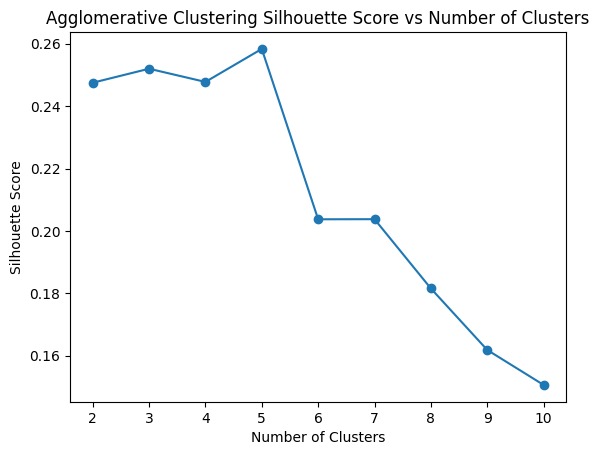

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Hierarchical Clustering (Agglomerative)
silhouette_scores_agg = []
range_of_clusters = range(2, 11)

for k in range_of_clusters:
    agg = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg.fit_predict(updated_array)
    score = silhouette_score(updated_array, agg_labels)
    silhouette_scores_agg.append(score)

# Plotting the Silhouette Score for Agglomerative Clustering
plt.plot(range_of_clusters, silhouette_scores_agg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Clustering Silhouette Score vs Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ma

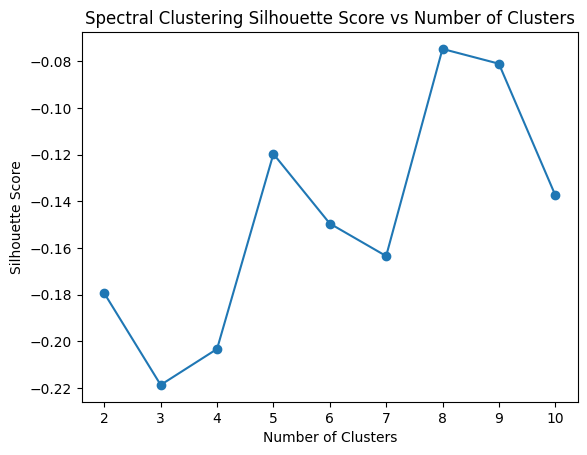

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Spectral Clustering
silhouette_scores_spectral = []
range_of_clusters = range(2, 11)

for k in range_of_clusters:
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(updated_array)
    score = silhouette_score(updated_array, spectral_labels)
    silhouette_scores_spectral.append(score)

# Plotting the Silhouette Score for Spectral Clustering
plt.plot(range_of_clusters, silhouette_scores_spectral, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Spectral Clustering Silhouette Score vs Number of Clusters')
plt.show()


In [ ]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.6 MB/s eta 0:00:00


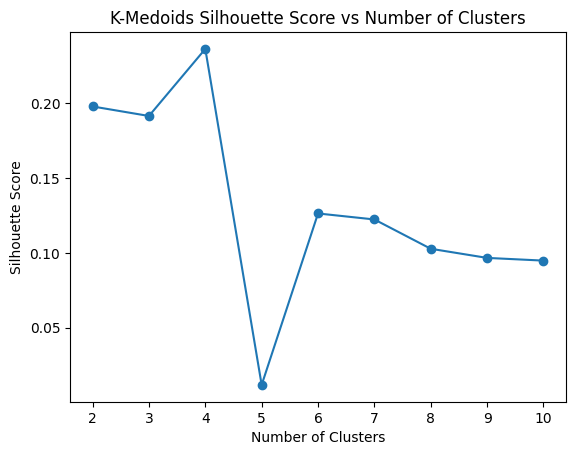

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# K-Medoids Clustering (PAM)
silhouette_scores_kmedoids = []
range_of_clusters = range(2, 11)

for k in range_of_clusters:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids_labels = kmedoids.fit_predict(updated_array)
    score = silhouette_score(updated_array, kmedoids_labels)
    silhouette_scores_kmedoids.append(score)

# Plotting the Silhouette Score for K-Medoids
plt.plot(range_of_clusters, silhouette_scores_kmedoids, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-Medoids Silhouette Score vs Number of Clusters')
plt.show()


In [ ]:
pip install fuzzy-c-means


In [ ]:
print(type(updated_array))

<class 'numpy.ndarray'>


In [ ]:
from fcmeans import FCM
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Ensure updated_array is a 2D array (samples, features)
print(f"Initial shape of updated_array: {updated_array.shape}")

# Check if there are NaN or infinite values in the data
if np.any(np.isnan(updated_array)) or np.any(np.isinf(updated_array)):
    print("There are NaN or infinite values in the data. Handling them...")
    # Replace NaN or infinite values with zeros (or other appropriate handling)
    updated_array = np.nan_to_num(updated_array)

# Optionally, standardize the data
scaler = StandardScaler()
updated_array = scaler.fit_transform(updated_array)

# Verify the shape after transformation
print(f"Shape of updated_array after scaling: {updated_array.shape}")

# Fuzzy C-Means Clustering
silhouette_scores_fcm = []
range_of_clusters = range(2, 11)

for k in range_of_clusters:
    fcm = FCM(n_clusters=k)
    fcm.fit(updated_array)
    fcm_labels = fcm.predict(updated_array).argmax(axis=1)
    score = silhouette_score(updated_array, fcm_labels)
    silhouette_scores_fcm.append(score)

# Plotting the Silhouette Score for Fuzzy C-Means
plt.plot(range_of_clusters, silhouette_scores_fcm, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Fuzzy C-Means Silhouette Score vs Number of Clusters')
plt.show()


Initial shape of updated_array: (16700, 22)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.6 MB/s eta 0:00:00


In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=4e4b96da4c1533e88ccb14e8ded6f6a0889a18be3b0277d2ce2f609ec08fadfd
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
from minisom import MiniSom
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Self-Organizing Maps (SOM)
silhouette_scores_som = []
range_of_clusters = range(2, 11)

for k in range_of_clusters:
    som = MiniSom(10, 10, updated_array.shape[1], sigma=1.0, learning_rate=0.5)
    som.train(updated_array, 100)
    som_labels = [som.winner(x) for x in updated_array]
    som_labels = [x[0] * 10 + x[1] for x in som_labels]  # Flattening the 2D grid to 1D
    score = silhouette_score(updated_array, som_labels)
    silhouette_scores_som.append(score)

# Plotting the Silhouette Score for SOM
plt.plot(range_of_clusters, silhouette_scores_som, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('SOM Silhouette Score vs Number of Clusters')
plt.show()


TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

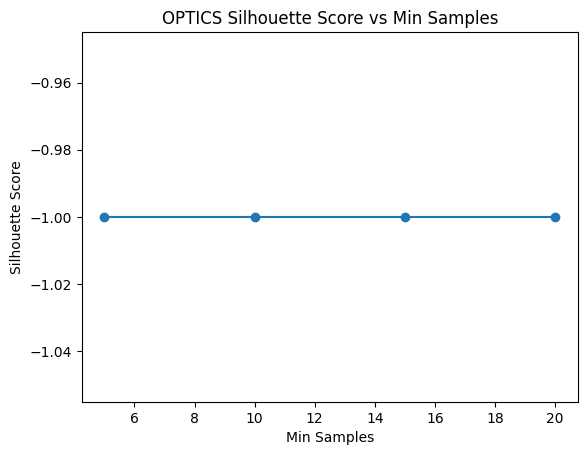

In [ ]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# OPTICS Clustering
silhouette_scores_optics = []
min_samples_range = [5, 10, 15, 20]

for min_samples in min_samples_range:
    optics = OPTICS(min_samples=min_samples)
    optics_labels = optics.fit_predict(updated_array)

    # OPTICS might label points as -1 (noise), so we only calculate silhouette score for labeled points
    if len(set(optics_labels)) > 1 and -1 not in optics_labels:
        score = silhouette_score(updated_array, optics_labels)
        silhouette_scores_optics.append(score)
    else:
        silhouette_scores_optics.append(-1)

# Plotting the Silhouette Score for OPTICS
plt.plot(min_samples_range, silhouette_scores_optics, marker='o')
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score')
plt.title('OPTICS Silhouette Score vs Min Samples')
plt.show()


In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Affinity Propagation Clustering
silhouette_scores_affinity = []
preference_range = range(-100, 0, 10)

for preference in preference_range:
    affinity = AffinityPropagation(preference=preference)
    affinity_labels = affinity.fit_predict(updated_array)
    score = silhouette_score(updated_array, affinity_labels)
    silhouette_scores_affinity.append(score)

# Plotting the Silhouette Score for Affinity Propagation
plt.plot(preference_range, silhouette_scores_affinity, marker='o')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
plt.title('Affinity Propagation Silhouette Score vs Preference')
plt.show()


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Af

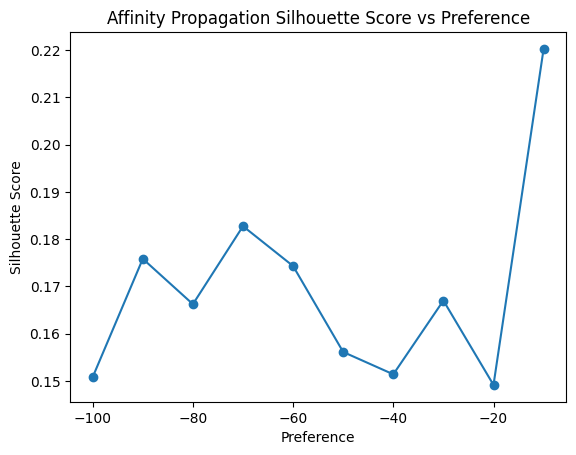

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Affinity Propagation Clustering
silhouette_scores_affinity = []
preference_range = range(-100, 0, 10)

for preference in preference_range:
    affinity = AffinityPropagation(preference=preference)
    affinity_labels = affinity.fit_predict(updated_array)
    score = silhouette_score(updated_array, affinity_labels)
    silhouette_scores_affinity.append(score)

# Plotting the Silhouette Score for Affinity Propagation
plt.plot(preference_range, silhouette_scores_affinity, marker='o')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
plt.title('Affinity Propagation Silhouette Score vs Preference')
plt.show()
